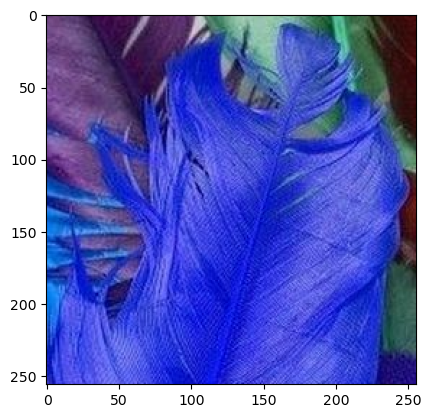

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset shape: (256, 256, 3)
Dataset: [[[ 105534830  190913003 1296077698]
  [ 105534831 2841571026  473923062]
  [ 105534831 1105164696 1296077698]
  ...
  [3025765142 1098445810 2834852140]
  [ 467204176  184194117 1098445810]
  [2933668084 1828503388   92097059]]

 [[  13437773 2749473968  381826004]
  [ 105534830  190913003 1296077698]
  [ 105534831 1105164696 1296077698]
  ...
  [1289358812  184194117 1098445810]
  [ 467204177 2834852140  276291174]
  [3025765142 1920600446  184194117]]

 [[ 105534830  190913003 1296077698]
  [2756192854 2019416390  473923063]
  [ 197631889 1197261754 1388174756]
  ...
  [ 467204177 2012697504  276291175]
  [3117862200 2012697504  276291175]
  [1381455870  276291174 2012697504]]

 ...

 [[ 920970580  920970580  849030180]
  [2565279852    6718887 1671184816]
  [ 552582349 3203240372  664836064]
  ...
  [3203240372  184194117  658117179]
  [2381085736 2834852140 3308775202]
  [ 644679406 1098445810 1572368872]]

 [[2933668084 1197261754 1947475990]

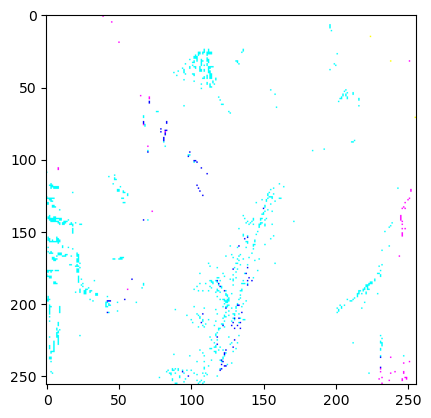

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def image_to_dataset(image_path):
    # Read the image
    image = cv2.imread(image_path)
#     if len(image.shape) == 3:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    p = 3472812659
    inverse_of_2 = pow(2, -1, p)

    # Multiply each pixel value by the inverse of 2 modulo p
    image_array = (image * inverse_of_2) % p
    return image_array

# Example usage
image_path = 'colourImg.jpg'

image = cv2.imread(image_path)
plt.imshow(image,cmap='gray')       
plt.show()

dataset = image_to_dataset(image_path)
print("Dataset shape:", dataset.shape)
print("Dataset:", dataset)
plt.imshow(dataset)       
plt.show()
#print(dataset[1])

In [2]:
# Eliptic curve parameters
a=71264358
b=2672718120
p=3472812659


# Base point co-ordinates
gx=1090012128
gy=2391085776
G=(gx,gy)

In [3]:
if((4*(a**3)+27*(b**2))%p == 0):
  print("Curve is singular")
else:
  print("Curve is non-singular")

Curve is non-singular


In [4]:
if(p%4==3):
  print("We can find the points")
else:
  print("We can't find the points")

We can find the points


In [5]:
import numpy as np
O=(np.inf,np.inf)

In [6]:
def addPoint(P,Q,p):
    x1,y1 =P
    x2,y2 =Q
    x1=int(x1)
    x2=int(x2)
    y1=int(y1)
    y2=int(y2)
    if( x1==x2 and y1==y2):
        b= (3*(x1**2) + a) * pow(2*y1,-1,p)
    else:
        b=(y2-y1)*pow(x2-x1,-1,p)

    x3=((b*b)-x1-x2)%p
    y3=((b*(x1-x3))-y1)%p
    return x3,y3


In [7]:
cipherText=[]
def eccEncrypt(P):
    print(P)
    publicKey=3
    e1=G
    a=e1
    for i in range(publicKey-1):
        aux=addPoint(a,e1,p)
        a=aux
    privateKey= aux
    r=5
    a=e1
    e2=privateKey
    b=e2
    for i in range(r-1):
        aux2=addPoint(a,e1,p)
        a=aux2
        aux1=addPoint(b,e2,p)
        b=aux1
    c1=aux2
    c2=addPoint(aux1,P,p)
    cipherText.append((c1,c2))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)
(256, 256, 3)


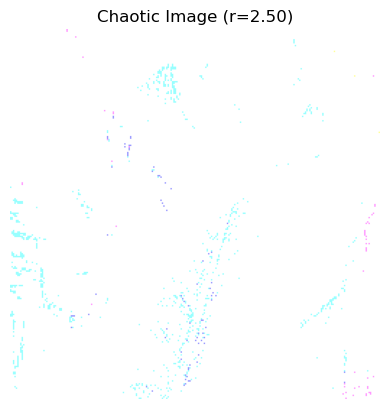

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def logistic_map(x, r):
    return r * x * (1 - x)

def generate_chaotic_sequence(seed, r, num_pixels):
    sequence = []
    x = seed
    for _ in range(num_pixels):
        x = logistic_map(x, r)
        sequence.append(x)
    return np.array(sequence)

def chaoticmapping():
    # Parameters
    seed = 0.5  # Initial value (between 0 and 1)
    r = 2.5     # Chaotic parameter (experiment with different values)
    num_pixels = 256 * 256 * 3

    # Generate chaotic sequence
    chaotic_sequence = generate_chaotic_sequence(seed, r, num_pixels)

#     print(dataset)
    print(dataset.shape)
    # Ensure the chaotic sequence has the same shape as the image array
    chaotic_sequence = chaotic_sequence.reshape(dataset.shape)
    print(chaotic_sequence.shape)
    # XOR each pixel value with the corresponding chaotic number
    chaotic_image = np.bitwise_xor(dataset, (chaotic_sequence * 255).astype(np.uint8))
    # Display the chaotic image
    plt.imshow(chaotic_image)
    plt.axis('off')
    plt.title(f"Chaotic Image (r={r:.2f})")
    plt.show()
    return chaotic_image

chaotic_image=chaoticmapping()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


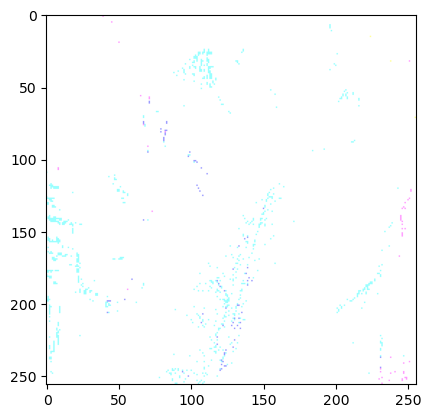

[[[ 105534961  190912894 1296077592]
  [ 105534967 2841570891  473922926]
  [ 105534966 1105164544 1296077595]
  ...
  [3025765263 1098445675 2834852277]
  [ 467204297  184194268 1098445675]
  [2933667949 1828503493   92097210]]

 [[  13437908 2749473833  381825869]
  [ 105534967  190912882 1296077595]
  [ 105534966 1105164545 1296077595]
  ...
  [1289358661  184194268 1098445675]
  [ 467204296 2834852277  276291327]
  [3025765263 1920600551  184194268]]

 [[ 105534967  190912882 1296077595]
  [2756192975 2019416543  473922926]
  [ 197631752 1197261603 1388174653]
  ...
  [ 467204296 2012697401  276291326]
  [3117862305 2012697401  276291326]
  [1381455719  276291327 2012697401]]

 ...

 [[ 920970701  920970701  849030333]
  [2565279989    6718782 1671184681]
  [ 552582228 3203240237  664835961]
  ...
  [3203240237  184194268  658117282]
  [2381085873 2834852277 3308775355]
  [ 644679287 1098445675 1572368753]]

 [[2933667949 1197261603 1947476111]
  [2019416543  283010197 1033224433]


(2348997958, 329565679)
(383626652, 3032656116)
(1210093452, 642763024)
(1337294787, 2060704996)
(2229904522, 1061021046)
(901367663, 1580801161)
(2066859142, 735223931)
(484513757, 1220511858)
(1195264731, 751997405)
(1660062240, 2173903371)
(1975953047, 1450818470)
(1017789530, 635645075)
(376899255, 407366009)
(1289015094, 878866639)
(673347219, 2201884653)
(626251572, 1916747598)
(623141632, 1309247271)
(1114538331, 1688841081)
(1295069487, 751080959)
(1683338094, 723832916)
(1023349216, 2308738989)
(820137179, 1687309142)
(2241600731, 2767127371)
(1683296969, 654148263)
(1271771705, 1145508392)
(468037232, 1168487006)
(283843204, 952270460)
(601427670, 1450284740)
(1885015665, 1658291734)
(1561709485, 2457646706)
(1563881690, 817972194)
(1337157768, 1091333460)
(1277156291, 1160009770)
(1166817934, 2013425651)
(2680224341, 319613809)
(505436462, 1024622035)
(870894785, 1017052696)
(677502887, 2555508781)
(1579626946, 2024195716)
(931142753, 2907980430)
(2085825769, 1932098513)
(13

(1094050677, 1276616401)
(1067372663, 2921719561)
(1387822256, 2624937529)
(1552646854, 1381612423)
(1382406750, 2665840708)
(1237200258, 2003077376)
(817952044, 974101882)
(1335771223, 1704159356)
(2108423200, 1115830635)
(1279287435, 1066786962)
(2458298970, 2347093052)
(2126850105, 1513472000)
(2229773621, 2506064552)
(2564764806, 1650513245)
(1869732815, 287053455)
(1110067336, 1717634156)
(2634235269, 925341317)
(2020022635, 1141630813)
(409944676, 2664702093)
(2551941056, 1583007431)
(904677280, 2183552699)
(2091455777, 2457683415)
(1533439869, 1519683803)
(1335489546, 1905806202)
(1780058447, 2180468860)
(1755843288, 2485066425)
(1780058447, 1136918397)
(1413209628, 1139848382)
(1555405355, 1640456379)
(447490932, 680220048)
(2232105226, 1336094687)
(484903891, 1263367211)
(590430104, 176189980)
(1155860897, 2191817508)
(2459761143, 1640029323)
(956855736, 663878283)
(2628637019, 1674720853)
(2043436188, 2882628664)
(2152923073, 934031755)
(1476867534, 2688057121)
(1663549801, 1

(2170529209, 1731239713)
(600836519, 1946735228)
(1040052621, 1135873705)
(1294224458, 770480333)
(756724358, 955468624)
(2077662547, 1660476701)
(1222095344, 1052451524)
(1144548588, 2485054052)
(2208763144, 1939190706)
(1799219792, 2488311453)
(405620297, 1735627195)
(278769090, 2420938387)
(356586711, 503595234)
(1270306676, 1542833507)
(3069996443, 1079402351)
(2143616921, 2471039208)
(1252263007, 1088798082)
(1773077050, 1043019724)
(2687328975, 1253891634)
(1161794578, 428013043)
(232992482, 1597286732)
(1169363833, 1537751946)
(444699254, 1538586450)
(2115383629, 2413198192)
(2684071577, 2165720732)
(1598587925, 982746901)
(2595754706, 1348974639)
(2339938659, 1517784248)
(606462462, 2363359623)
(1542833507, 419845555)
(1938407070, 1263325649)
(1022780650, 2083017028)
(1505892583, 2637750999)
(1651877440, 1410538387)
(2102386616, 1009333867)
(2507420006, 2711181666)
(1695675444, 1083558598)
(898570248, 1050668980)
(2294567626, 2110373448)
(1112298999, 2101175873)
(2959911198, 27

(2493841478, 1609197525)
(1834595792, 1697514285)
(1215744176, 1854498765)
(2101116999, 93042889)
(1228069564, 1716026822)
(2278651005, 1155155933)
(237974353, 814304612)
(944283849, 1283833675)
(770065772, 1657639364)
(2362736538, 2177707965)
(1163061107, 2378677973)
(1232358218, 2538746165)
(1150317885, 774360497)
(1677319072, 1601867690)
(2576955405, 1099294976)
(1555197259, 929364451)
(1278578768, 1235984213)
(1055554624, 3053661372)
(2518624190, 1909764413)
(1243030321, 911296130)
(2446822336, 2445987972)
(2451405500, 2543502556)
(1200860995, 1295887920)
(839191651, 1800015863)
(266118332, 2090857435)
(1272467211, 1994120955)
(226453649, 560586004)
(1227385025, 1521917475)
(2355365212, 823096334)
(748037256, 999278964)
(308051560, 1206386926)
(1554438028, 2075719126)
(1245544257, 682978897)
(524668437, 610046821)
(980595355, 859659955)
(1195952610, 1011758655)
(2434458642, 2344497353)
(1442046020, 1653679158)
(2436790090, 1744147631)
(1399180277, 2095587193)
(1304660589, 810524316

In [9]:
image= chaotic_image
chimg= image
plt.imshow(image)
plt.show()
print(image)
pixels=[]
for i in range(256):
    for j in range(256):
        #eccEncrypt((image[i][0],image[i][1]))
#         print(image[i][j][0],image[i][j][1],image[i][j][2])
        
        val=(0.299*image[i][j][0]) + (0.587*image[i][j][1]) + (0.114*image[i][j][2])
        #print(val)
        pixels.append(int(val))

for i in range(0,len(pixels),2):
    eccEncrypt((int(pixels[i]),int(pixels[i+1])))
# print(cipherText)
print(len(pixels))
# print(pixels)
print(291373667/0.299)

In [10]:
img=[]
row=[]
alpha=[]
for i in range(len(cipherText)):
#     for j in range(len(cipherText[i])):
    val1=cipherText[i][1][0]
    val2=cipherText[i][1][1]
    integer_value = val1

    # Extract RGB components using byte masking and shifting
    alp= (integer_value >> 24) & 0xFF
    red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
    green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
    blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
    pix1=[red,green,blue]
    alpha.append(alp)
    pix1=np.array(pix1)
    integer_value = val2

    # Extract RGB components using byte masking and shifting
    alp= (integer_value >> 24) & 0xFF
    red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
    green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
    blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
    alpha.append(alp)
    pix2=[red,green,blue]
    pix2=np.array(pix2)
    
    if(len(row)!=256):
        row.append(pix1)
        row.append(pix2)
    else:
        row=np.array(row)
        img.append(row)
        row=[]
        row.append(pix1)
        row.append(pix2)
        
print(len(img))
print(len(img[0]))
print(len(img[0][0]))
# print(alpha)

255
256
3


In [11]:
from PIL import Image
import numpy as np

# Your code to create the 'img' list of pixel values

# Convert the 'img' list to a numpy array
img_array = np.array(img, dtype=np.uint8)

# Create an image from the numpy array
image = Image.fromarray(img_array)

# Save or display the image
image.save("output_image.png")  # Save the image to a file
image.show()  # Display the image


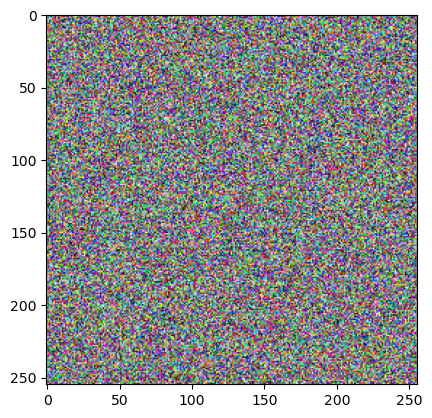

In [12]:
image_path = 'output_image.png'
image = cv2.imread(image_path)

# if len(image.shape) == 3:
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)       
plt.show()

In [13]:
packed=[]
# print(image) # RGB components
for i in range(255):
    for j in range(256):
        a=alpha[j]
        R = image[i][j][0]
        G = image[i][j][1]
        B = image[i][j][2]
#         print(a,R,G,B)

        # Pack RGB components into a single integer value
        packed_value = (a << 24) |(B << 16) | (G << 8) | R
        packed.append(packed_value)

# print(packed)
# integer_value = packed_value

#     # Extract RGB components using byte masking and shifting
# alp= (integer_value >> 24) & 0xFF
# red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
# green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
# blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
# pix1=[blue,green,red]
# print(alp)
# print(pix1)

In [14]:
decodedC2=[]
for i in range(0,len(packed),2):
    decodedC2.append((packed[i],packed[i+1]))
# print(decodedC2)


In [15]:
plainText=[]
p=3472812659
def eccDecrypt():
    publicKey=3
    for i in range(len(decodedC2)):
#     print(i)
        c1=cipherText[i][0]
        c2=decodedC2[i]
        print(c1,c2)
        a=c1
        for i in range(publicKey-1):
            aux=addPoint(a,c1,p)
            a=aux
        dc1= (-aux[1])%p
        print(aux)
        print(dc1)
        dc1=(aux[0],dc1)
        print(dc1)
        P=addPoint(c2,dc1,p)
        plainText.append(P)


In [16]:
eccDecrypt()
# print(plainText)
# 488047052, 1798993526,

(656391112, 2260244958) (2679094209, 2211499344)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (1289516747, 348768905)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (541373342, 741472194)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (442592663, 1631643006)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (3069744698, 1443220558)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (1668034385, 2450938641)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (2932529510, 2424702178)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (1925260265, 1959479384)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (1895200520, 1932470193)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (2537806857, 6620

(656391112, 2260244958) (2534489257, 744053597)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (23298001, 678537677)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (550497993, 1918458633)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (2488199261, 1614011854)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (2195081172, 1228159307)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (852369807, 2668480899)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (1694553383, 1350684243)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (2894066303, 1983907695)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (1427924248, 2130650549)
(712464523, 989730963)
2483081696
(712464523, 2483081696)
(656391112, 2260244958) (1557735355, 135057

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
obpix=[]
for i in plainText:
    obpix.append(i[0])
    obpix.append(i[1])
print(obpix)

[3141583254, 1801685725, 3443477544, 2822534795, 3299224915, 3135955195, 1820402691, 2800256450, 701588465, 1567301960, 147711508, 2320246269, 3056683871, 3186564305, 318803711, 970728752, 576884579, 150017194, 2962417569, 2155270652, 176745734, 3042593661, 650406940, 1227746181, 3129343144, 1387651236, 501343214, 442007327, 3164369098, 353298900, 1989978930, 1706829824, 222747444, 2953522308, 378675106, 3053898868, 2410810963, 686464700, 1323477871, 2100645027, 542647167, 2021613375, 196274598, 1514421049, 2305083300, 1459223234, 2973131620, 1836381076, 194165816, 1484566854, 1454276829, 3035288633, 2448948731, 7108068, 1116772519, 3345106883, 1415101509, 1954164234, 2682168950, 1071875424, 1235694785, 1430994187, 1569518471, 2210163018, 1498248658, 2365329550, 2667196452, 687106543, 1475113783, 1209059586, 3374083092, 1031295424, 2662717167, 956854067, 2831366415, 3260576891, 1303302898, 1607107209, 1976343475, 1342281455, 2893777785, 1212717757, 598984238, 530469409, 719552729, 1700

In [18]:
img=[]
row=[]
for i in pixels:
    
    integer_value = i
        # Extract RGB components using byte masking and shifting
    alp= (integer_value >> 24) & 0xFF
    red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
    green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
    blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
    pix1=[blue,green,red]
    
    pix1=np.array(pix1)
    
    if(len(row)!=256):
        row.append(pix1)
        
    else:
        row=np.array(row)
        img.append(row)
        row=[]
        row.append(pix1)
print(len(img))
print(len(img[0]))
print(len(img[0][0]))

255
256
3


In [19]:
from PIL import Image
import numpy as np

# Your code to create the 'img' list of pixel values

# Convert the 'img' list to a numpy array
img_array = np.array(chaotic_image, dtype=np.uint8)

# Create an image from the numpy array
image = Image.fromarray(img_array)

# chimg=np.array(chimg, dtype=np.uint8)
# image=Image.fromarray(chimg)
# Save or display the image
image.save("output1.png")  # Save the image to a file
image.show()  # Display the image


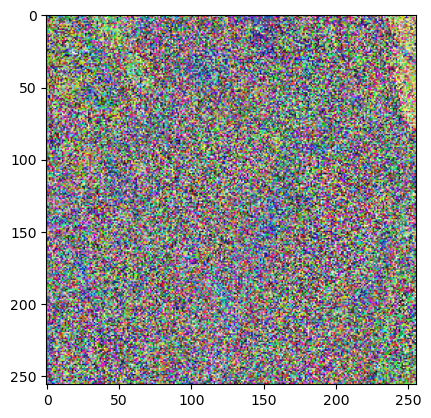

In [20]:
image_path = 'output1.png'
image = cv2.imread(image_path)

# if len(image.shape) == 3:
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)       
plt.show()

In [21]:
# val = (105534961 & 0xFF) |((190912894  & 0xFF)<< 8) | ((1296077592 & 0xFFFF) <<16)
# (value1 & 0xFF) | ((value2 & 0xFF) << 8) | ((value3 & 0xFFFF) << 16)
# val=(0.299*105534961) + (0.587*190912894) + (0.114*1296077592)
print(int(val))
integer_value = obpix[0]

    # Extract RGB components using byte masking and shifting
# alp= (integer_value >> 24) & 0xFF
red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
pix1=[blue,green,red]
# print(alp)
print(pix1)

725955483
[150, 193, 64]


In [22]:

a=alpha[0]
R = 193
G = 187
B = 175
print(a,R,G,B)

        # Pack RGB components into a single integer value
packed_value = (a << 24) |(B << 16) | (G << 8) | R
        

print(packed_value)
integer_value = 2679094209

    # Extract RGB components using byte masking and shifting
alp= (integer_value >> 24) & 0xFF
red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
pix1=[blue,green,red]
print(alp)
print(pix1)

159 193 187 175
2679094209
159
[193, 187, 175]


In [23]:
def addPoint(P,Q,p):
    x1,y1 =P
    x2,y2 =Q
    x1=int(x1)
    x2=int(x2)
    y1=int(y1)
    y2=int(y2)
    if( x1==x2 and y1==y2):
        b= (3*x1*x2 + a) * pow(2*y1,-1,p)
    else:
        b=(y2-y1)*pow(x2-x1,-1,p)

    x3=(b*b-x1-x2)%p
    y3=(b*(x1-x3)-y1)%p
    return x3,y3
# x,y=addPoint((656391112, 2260244958),(656391112, 2260244958),3472812659)
# print(x,y)

In [24]:
# x,y=addPoint((1184157512,3118380422),(656391112, 2260244958),3472812659)
# print(x,y)

In [25]:
# y=-y+p
# print(y)

In [26]:
# x,y=addPoint((2679094209, 2211499344),(2631785526, 2056796651),3472812659)
# print(x,y)

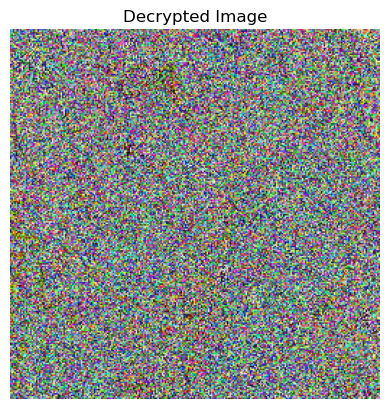

In [27]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def logistic_map(x, r):
    return r * x * (1 - x)

def generate_chaotic_sequence(seed, r, num_pixels):
    sequence = []
    x = seed
    for _ in range(num_pixels):
        x = logistic_map(x, r)
        sequence.append(x)
    return np.array(sequence)

def reverse_encryption(chaotic_image, chaotic_sequence, p):
    # chaotic_sequence_reshaped = chaotic_sequence.reshape(chaotic_image.shape[:2])
    decrypted_array = np.bitwise_xor(chaotic_image, (chaotic_sequence* 255).astype(np.uint8))

    decrypted_array = (decrypted_array * 2) % p

    decrypted_image = Image.fromarray(decrypted_array.astype(np.uint8))
    
    return decrypted_image

def main():
    seed = 0.5  
    r = 2.5    
    num_pixels = 256*256*3
    p = 3472812659
    image_path = 'output1.png'
    chaotic_image=cv2.imread(image_path)
    chaotic_sequence = generate_chaotic_sequence(seed, r, num_pixels)
    
    chaotic_sequence = chaotic_sequence.reshape(dataset.shape)
    
    decrypted_image = reverse_encryption(chaotic_image, chaotic_sequence, p)
    decrypted_image.save("decrypted_image.png") 
    # cv2.imwrite("decrypted_image.png", decrypted_image)

    plt.imshow(decrypted_image)
    plt.axis('off')
    plt.title("Decrypted Image")
    plt.show()

if __name__ == "__main__":
    main()
